<a href="https://colab.research.google.com/github/Uemerson/masters-degree-in-computer-science-from-unesp/blob/main/voxelmorph/oasis/max-pooling/100_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [1]:
# install voxelmorph
!git clone https://github.com/voxelmorph/voxelmorph.git # getting vxm from git to use scripts
!pip install neurite # dependencies

Cloning into 'voxelmorph'...
remote: Enumerating objects: 3223, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 3223 (delta 7), reused 12 (delta 5), pack-reused 3202
Receiving objects: 100% (3223/3223), 129.17 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (2071/2071), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystrum: filename=pystrum-0.3-py3-none-any.whl size=19549 sha256=7da4cf3fd1c35cf592f1fe284ac3b4f955107c3d10f2556340b685ce96509857
  Stored in directory: /root/.cache/pip/wheels/33/42/e2/6312e2cd3efadacc2714759efc7c7dc1513db7853e8bd508f6
Successfully built pystrum


In [2]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# import voxelmorph
import sys 
sys.path.append('voxelmorph')
import voxelmorph as vxm

# Download dataset OASIS

In [5]:
# get neurite-OASIS data
!wget https://surfer.nmr.mgh.harvard.edu/ftp/data/neurite/data/neurite-oasis.2d.v1.0.tar
!mkdir OASIS
!tar xf neurite-oasis.2d.v1.0.tar --directory 'OASIS'

# !wget https://surfer.nmr.mgh.harvard.edu/ftp/data/neurite/data/neurite-oasis.v1.0.tar
# !mkdir OASIS
# !tar xf neurite-oasis.v1.0.tar --directory 'OASIS'

--2023-05-02 16:25:17--  https://surfer.nmr.mgh.harvard.edu/ftp/data/neurite/data/neurite-oasis.2d.v1.0.tar
Resolving surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)... 132.183.1.43
Connecting to surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)|132.183.1.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24903680 (24M) [application/x-tar]
Saving to: ‘neurite-oasis.2d.v1.0.tar’

neurite-oasis.2d.v1 100%[===================>]  23.75M  7.44MB/s    in 3.2s    

2023-05-02 16:25:22 (7.44 MB/s) - ‘neurite-oasis.2d.v1.0.tar’ saved [24903680/24903680]



In [6]:
# write a list of OASIS subjects to a training file
import pathlib
path = pathlib.Path('/content/OASIS')
subj_lst_m = [str(f/'slice_norm.nii.gz') for f in path.iterdir() if str(f).endswith('MR1')]
with open('train_list.txt','w') as tfile:
	tfile.write('\n'.join(subj_lst_m))

# Train

In [8]:
# run training via train.py (here just 10 epochs for demonstration)
%run -i /content/voxelmorph/scripts/tf/train.py --img-list 'train_list.txt' --epochs 100 --gpu 0

Epoch 1/100
100/100 [==============================] - 23s 37ms/step - batch: 49.5000 - size: 1.0000 - loss: 0.0070 - vxm_dense_transformer_loss: 0.0070 - vxm_dense_flow_resize_loss: 8.8562e-05
Epoch 2/100
100/100 [==============================] - 4s 36ms/step - batch: 49.5000 - size: 1.0000 - loss: 0.0063 - vxm_dense_transformer_loss: 0.0063 - vxm_dense_flow_resize_loss: 0.0036
Epoch 3/100
100/100 [==============================] - 5s 49ms/step - batch: 49.5000 - size: 1.0000 - loss: 0.0056 - vxm_dense_transformer_loss: 0.0053 - vxm_dense_flow_resize_loss: 0.0290
Epoch 4/100
100/100 [==============================] - 4s 38ms/step - batch: 49.5000 - size: 1.0000 - loss: 0.0052 - vxm_dense_transformer_loss: 0.0047 - vxm_dense_flow_resize_loss: 0.0472
Epoch 5/100
100/100 [==============================] - 4s 38ms/step - batch: 49.5000 - size: 1.0000 - loss: 0.0048 - vxm_dense_transformer_loss: 0.0043 - vxm_dense_flow_resize_loss: 0.0496
Epoch 6/100
100/100 [=============================

# Registration

In [15]:
%run -i /content/voxelmorph/scripts/tf/register.py \
--moving /content/OASIS/OASIS_OAS1_0001_MR1/slice_orig.nii.gz \
--fixed /content/OASIS/OASIS_OAS1_0001_MR1/slice_norm.nii.gz \
--moved warped.nii.gz \
--model /content/models/0100.h5 \
--gpu 0

In [16]:
warped_load = nib.load('/content/warped.nii.gz').get_fdata()

moving_load = nib.load(
    '/content/OASIS/OASIS_OAS1_0001_MR1/slice_orig.nii.gz'
).get_fdata()

fixed_load = nib.load(
    '/content/OASIS/OASIS_OAS1_0001_MR1/slice_norm.nii.gz'
).get_fdata()

print(
      warped_load.shape,
      moving_load.shape,
      fixed_load.shape
)

(160, 192) (160, 192, 1) (160, 192, 1)


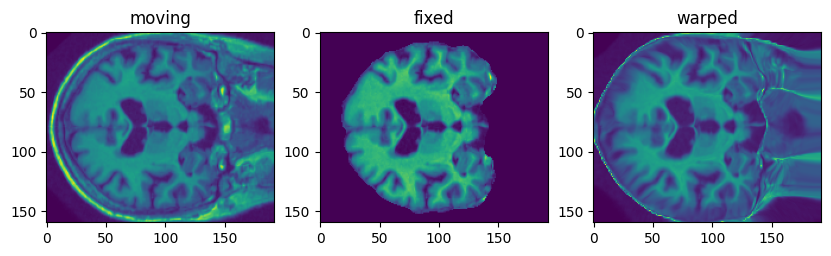

In [17]:
moving = moving_load[:,:]
fixed = fixed_load[:,:]
warped = warped_load[:,:]

# Create a figure object and add subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# Plot each image on a separate subplot
ax[0].imshow(moving)
ax[1].imshow(fixed)
ax[2].imshow(warped)

# Set title and axis labels
ax[0].set_title('moving')
ax[1].set_title('fixed')
ax[2].set_title('warped')

# Display the figure
plt.show()

# Plot pairs

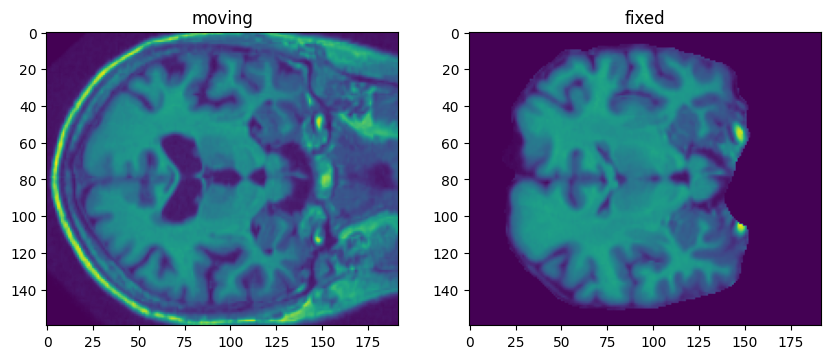

In [11]:
moving_load = nib.load(
    '/content/OASIS/OASIS_OAS1_0001_MR1/slice_orig.nii.gz'
).get_fdata()

fixed_load = nib.load(
    '/content/OASIS/OASIS_OAS1_0002_MR1/slice_norm.nii.gz'
).get_fdata()

moving = moving_load[:,:]
fixed = fixed_load[:,:]

# Create a figure object and add subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot each image on a separate subplot
ax[0].imshow(moving)
ax[1].imshow(fixed)

# Set title and axis labels
ax[0].set_title('moving')
ax[1].set_title('fixed')

# Display the figure
plt.show()

# Testing (measuring Dice scores)

In [14]:
%run -i /content/voxelmorph/scripts/tf/test.py \
--model /content/models/0100.h5 \
--pairs /content/pairs.txt \
--img-prefix /content/OASIS/  \
--seg-prefix /content/OASIS/  \
--img-suffix /slice_norm.nii.gz  \
--seg-suffix /slice_seg24.nii.gz

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Pair 1    Reg Time: 4.6393    Dice: 0.6047 +/- 0.3012
Pair 2    Reg Time: 0.0589    Dice: 0.6481 +/- 0.3133

Avg Reg Time: 0.0589 +/- 0.0000  (skipping first prediction)
Avg Dice: 0.6264 +/- 0.0217


# Configs

Replace model.compile to 
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=args.lr), loss=losses, loss_weights=weights) in /content/voxelmorph/scripts/tf/train.py

Explain of testing script:

https://github.com/voxelmorph/voxelmorph/issues/373